# Snapchat Political Ads
This project uses political ads data from Snapchat, a popular social media app. Interesting questions to consider include:
- What are the most prevalent organizations, advertisers, and ballot candidates in the data? Do you recognize any?
- What are the characteristics of ads with a large reach, i.e., many views? What may a campaign consider when maximizing an ad's reach?
- What are the characteristics of ads with a smaller reach, i.e., less views? Aside from funding constraints, why might a campaign want to produce an ad with a smaller but more targeted reach?
- What are the characteristics of the most expensive ads? If a campaign is limited on advertising funds, what type of ad may the campaign consider?
- What groups or regions are targeted frequently? (For example, for single-gender campaigns, are men or women targeted more frequently?) What groups or regions are targeted less frequently? Why? Does this depend on the type of campaign?
- Have the characteristics of ads changed over time (e.g. over the past year)?
- When is the most common local time of day for an ad's start date? What about the most common day of week? (Make sure to account for time zones for both questions.)

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.snap.com/en-US/political-ads/). Download both the 2018 CSV and the 2019 CSV. 

The CSVs have the same filename; rename the CSVs as needed.

Note that the CSVs have the exact same columns and the exact same data dictionaries (`readme.txt`).

### Cleaning and EDA
- Concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years.
- Clean the data.
    - Convert `StartDate` and `EndDate` into datetime. Make sure the datetimes are in the correct time zone.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: What is the "Z" at the end of each timestamp?*

*Hint 2: `pd.to_datetime` will be useful here. `Series.dt.tz_convert` will be useful if a change in time zone is needed.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
Many columns which have `NaN` values may not actually have missing data. How come? In some cases, a null or empty value corresponds to an actual, meaningful value. For example, `readme.txt` states the following about `Gender`:

>  Gender - Gender targeting criteria used in the Ad. If empty, then it is targeting all genders

In this scenario, an empty `Gender` value (which is read in as `NaN` in pandas) corresponds to "all genders".

- Refer to the data dictionary to determine which columns do **not** belong to the scenario above. Assess the missingness of one of these columns.

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
TODO #Create/Select a question to explore
* The more common political party advertising
    * could split this on gender; e.g. are men more democratic?
* the highest impression rate by:
    * age group?
    * political party?
        * could asses the political preference of snapchat users
    * both?
        * could asses political preference of users by age
* Does spending more money equate to more impressions?
    * split by party

### Cleaning and EDA
TODO
* split the spending into two groups:
    * below 1500
    * above 1500


### Assessment of Missingness

The columns * contain null values. Looking at readme.txt, the null values in * are explained/accounted for. We must then assess the missingness of the remaining columns *

TODO

### Hypothesis Test
TODO


The tests assume that the effectiveness of an ad corresponds to how many impressions it makes. Because of this, the data may not be accurate or properly reflect the effectiveness of an ad.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [36]:
# load the csv files for 2018 and 2019
fp_18 = os.path.join('data', 'ads_2018.csv')
fp_19 = os.path.join('data', 'ads_2019.csv')

# read files into dataframes
df_18 = pd.read_csv(fp_18)
df_19 = pd.read_csv(fp_19)
ad_data = pd.concat([df_18, df_19])
ad_data.head()

,ADID,CreativeUrl,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,...,Interests,OsType,Segments,LocationType,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),Targeting Geo - Postal Code,CreativeProperties
0,91db2796a80472ed8c2bfa17760b3ce1471f6ec1f3147b...,https://www.snap.com/political-ads/asset/b2c47...,1044,137185,2018/10/30 17:45:51Z,2018/11/07 00:00:00Z,"GMMB, Inc","3050 K Street,Washington,20007,US",NaN,JB for Governor,...,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://iwillvote.com/?state=il
1,97e3f17d5ec164c454a35d2822734482ca60be3f3af310...,https://www.snap.com/political-ads/asset/affc7...,279,94161,2018/12/23 14:26:52Z,2018/12/28 14:28:06Z,Revolution Messaging,"1730 Rhode Island Ave NW,Washington,20036,US",NaN,Paid for by ReBuild USA,...,"Arts & Culture Mavens,Chat Fiction Enthusiasts...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://rebuildusa.info/landing-3
2,14535fea019a9b1a910a77ce1555af8bdedbb5c78fb60a...,https://www.snap.com/political-ads/asset/754f6...,6743,3149886,2018/10/06 01:11:41Z,2018/11/07 03:00:00Z,Lockwood Strategy,US,NaN,Change Now,...,"TV Live Event Viewers (The Academy Awards),TV ...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://action.socalhealthcarecoa...
3,10b64550ad4a23c651d7883746cabeac93cbd92d5f3b3f...,https://www.snap.com/political-ads/asset/818ae...,3698,573475,2018/11/02 16:20:57Z,2018/11/06 18:15:30Z,The Prosper Group,"435 E. Main,Greenwood,46143,US",NaN,No On L,...,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,"92801,92802,92803,92804,92805,92806,92807,9280...",web_view_url:https://www.stopmeasurel.com
4,2438786c60ae41cf56614885b415a72857bbfb5c06f760...,https://www.snap.com/political-ads/asset/2c264...,445,232906,2018/11/27 21:44:19Z,2019/01/13 21:43:53Z,Amnesty International UK,"17-25 New Inn Yard,London,EC2A 3EA,GB",NaN,Amnesty International UK,...,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://www.amnesty.org.uk/write-...


In [37]:
# convert StartDate and EndDate to date time objects (UTC)
# timezones will not be used in our analysis
ad_data['StartDate'] = pd.to_datetime(ad_data['StartDate'])
ad_data['EndDate'] = pd.to_datetime(ad_data['EndDate'])

# display the data type of each column
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 2643
Data columns (total 27 columns):
ADID                           3303 non-null object
CreativeUrl                    3303 non-null object
Spend                          3303 non-null int64
Impressions                    3303 non-null int64
StartDate                      3303 non-null datetime64[ns]
EndDate                        2647 non-null datetime64[ns]
OrganizationName               3303 non-null object
BillingAddress                 3303 non-null object
CandidateBallotInformation     225 non-null object
PayingAdvertiserName           3303 non-null object
Gender                         322 non-null object
AgeBracket                     3029 non-null object
CountryCode                    3303 non-null object
RegionID                       1013 non-null object
ElectoralDistrictID            65 non-null object
LatLongRad                     0 non-null float64
MetroID                        180 non-null object
In

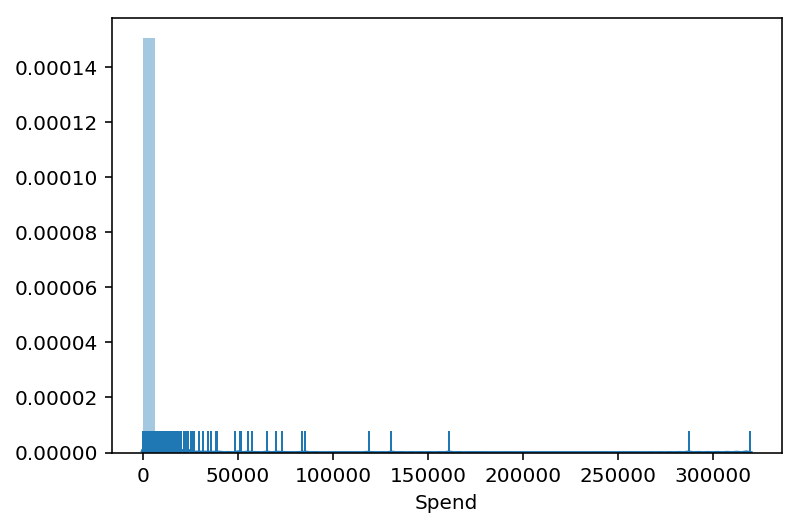

In [4]:
# Exploratory Data Analysis

# we will begin by examining how much is spent on ads

# plot the spending data 
# plot types: hist, kde, rug
sns.distplot(ad_data['Spend'], hist=True, kde=True, rug=True)

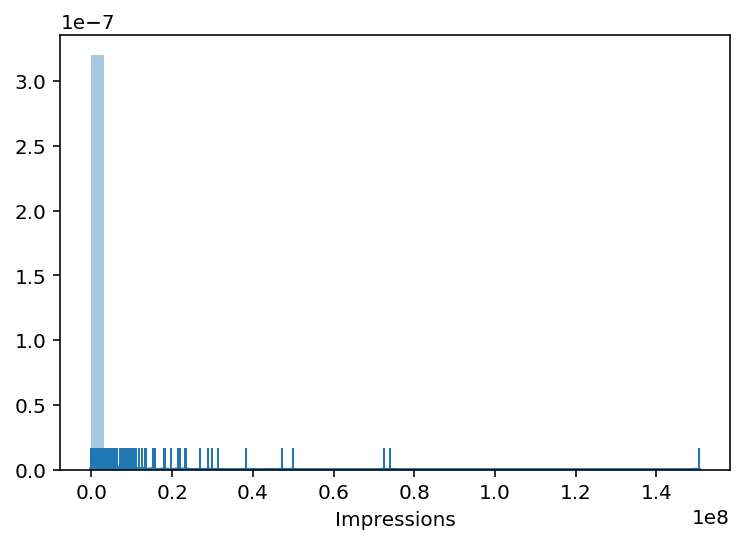

In [5]:
# next, we look at the effectiveness of those ads in the form of impressions

# plot the impressions data 
# plot types: hist, kde, rug
sns.distplot(ad_data['Impressions'], hist=True, kde=True, rug=True)

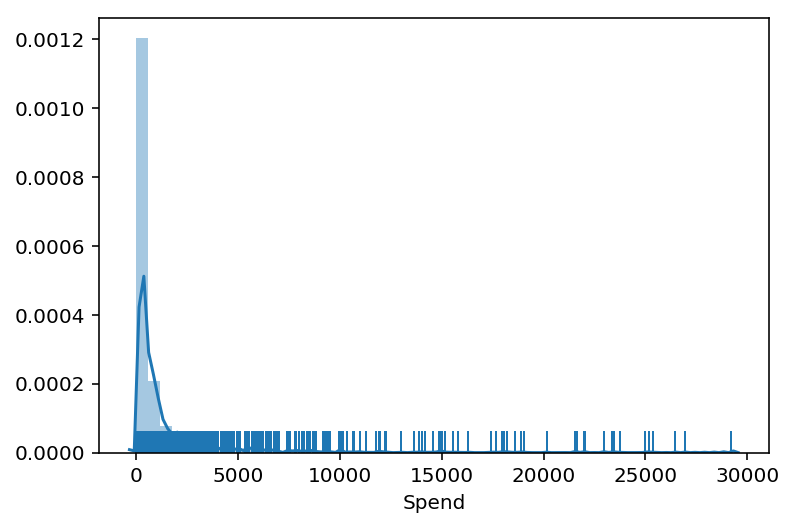

In [40]:
# looking at the plots, we see that both plots have very large outliers.
# the existance those outliers makes the above plots rather meaningless,
# so we will now remove those outliers

# we define an outlier to be any datapoint greater than 3 standard deviations
# away from the mean
spend_mean = ad_data['Spend'].mean()
spend_std = ad_data['Spend'].std()
spend_no_out = ad_data['Spend'][abs(spend_mean - ad_data['Spend'])/spend_std <= 3]


# plot the spend data for with outliers removed
# plot types: hist, kde, rug
sns.distplot(spend_no_out, hist=True, kde=True, rug=True)

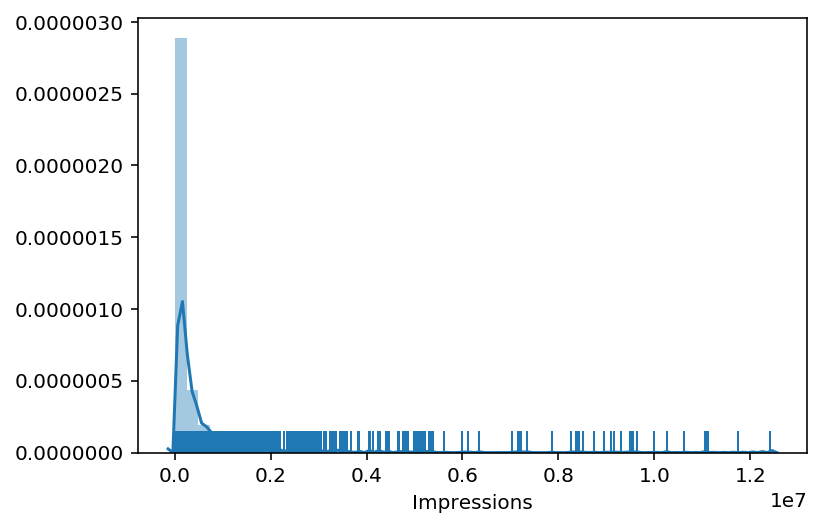

In [42]:
# repeat the process for impressions

imp_mean = ad_data['Impressions'].mean()
imp_std = ad_data['Impressions'].std()
imp_no_out = ad_data['Impressions'][abs(imp_mean - ad_data['Impressions'])/imp_std <= 3]

# plot the impressions data for with outliers removed
# plot types: hist, kde, rug
sns.distplot(imp_no_out, hist=True, kde=True, rug=True)

sns.distplot(spend_no_out, hist=True, kde=True, rug=True)

In [87]:
# while the distributions still look similar, the plots are significantly different

# create variables of spend and imp for convenience
spend = ad_data['Spend']
imp = ad_data['Impressions']

# calculate the statistics for each data series using pandas' Series.describe()
# rename the series without outliers to clarify
spend_stats = ad_data['Spend'].describe()
spend_no_out_stats = spend_no_out.describe().rename('Spend no outliers')
imp_stats = ad_data['Impressions'].describe()
imp_no_out_stats = imp_no_out.describe().rename('Impressions no outliers')

# display summary stats in data frame
pd.DataFrame([
    spend_stats, 
    spend_no_out_stats, 
    imp_stats, 
    imp_no_out_stats
])

,count,mean,std,min,25%,50%,75%,max
Spend,3303.0,1564.264608,9.679614e+03,0.0,41.0,184.0,797.50,319467.0
Spend no outliers,3282.0,1005.408592,2.626486e+03,0.0,41.0,178.0,774.75,29215.0
Impressions,3303.0,670984.530427,3.949157e+06,1.0,13468.0,68914.0,316056.50,150532010.0
Impressions no outliers,3277.0,422870.233750,1.133705e+06,1.0,13333.0,67449.0,304845.00,12414920.0


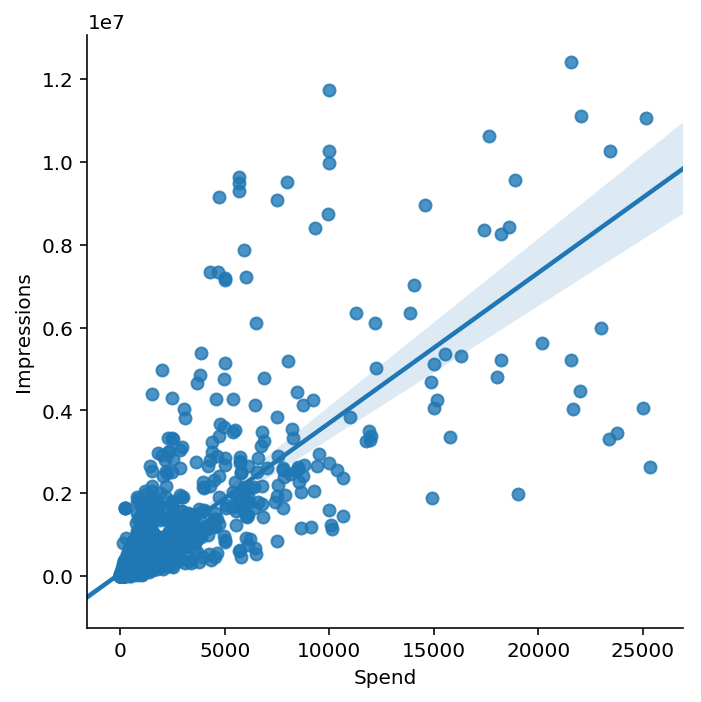

In [118]:
# looking at the counts column, we see that we retained most of the data


# we will now plot spend and impressions against each other

# get a dataframe with outliers in spend and impressions removed
data_no_out = ad_data[
    (abs(spend_mean - ad_data['Spend'])/spend_std <= 3) & 
    (abs(imp_mean - ad_data['Impressions'])/imp_std <= 3)
]

# plot the linear regression plot for Spend and Impressions
sns.lmplot(data=data_no_out, x='Spend', y='Impressions')

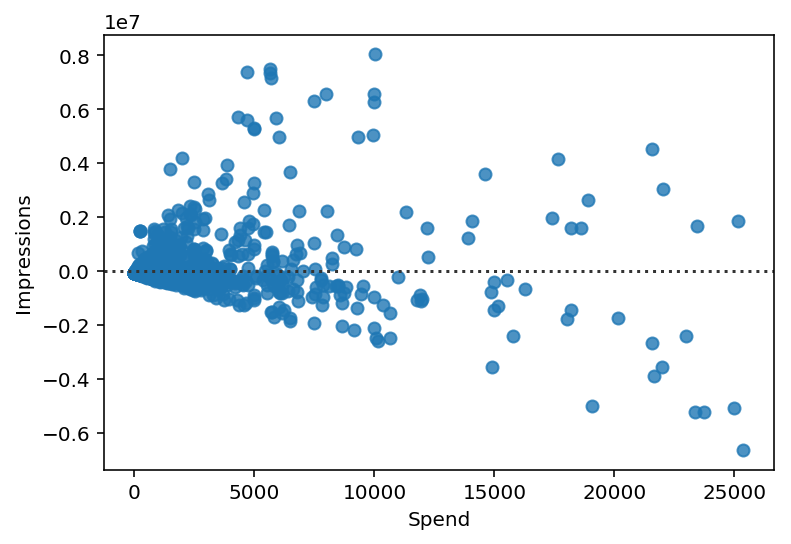

In [119]:
# to check how well this regression line fits, we can look at the residual plot
sns.residplot(data=data_no_out, x='Spend', y='Impressions')

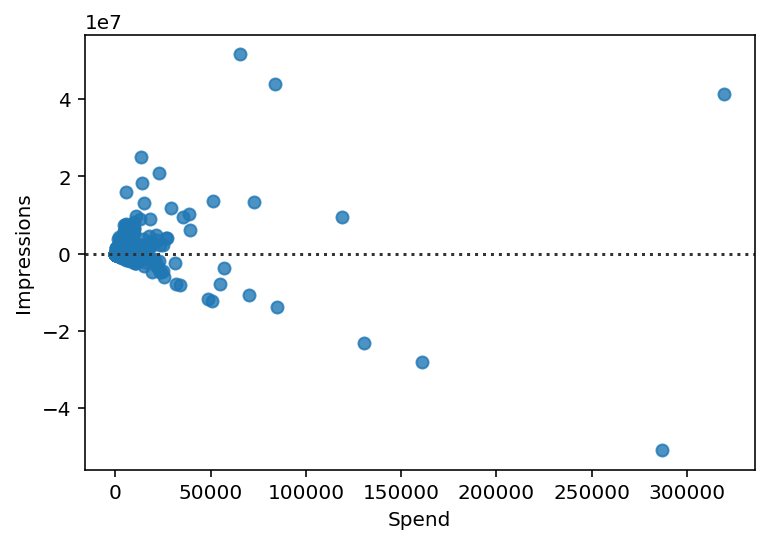

In [123]:
# the data is not scattered above and below the regression line randomly; however, 
# modelling this data accurately appears to require a complex, customized function


# we can compare these residuals to the residuals we would have had we not removed the outliers
sns.residplot(data=ad_data, x='Spend', y='Impressions')

We can also look at how other variables affect the relationship between Spend and Impressions

We can split the data into ads that target an age demographic (non null values) and ads that do not target an age demographic (null values).

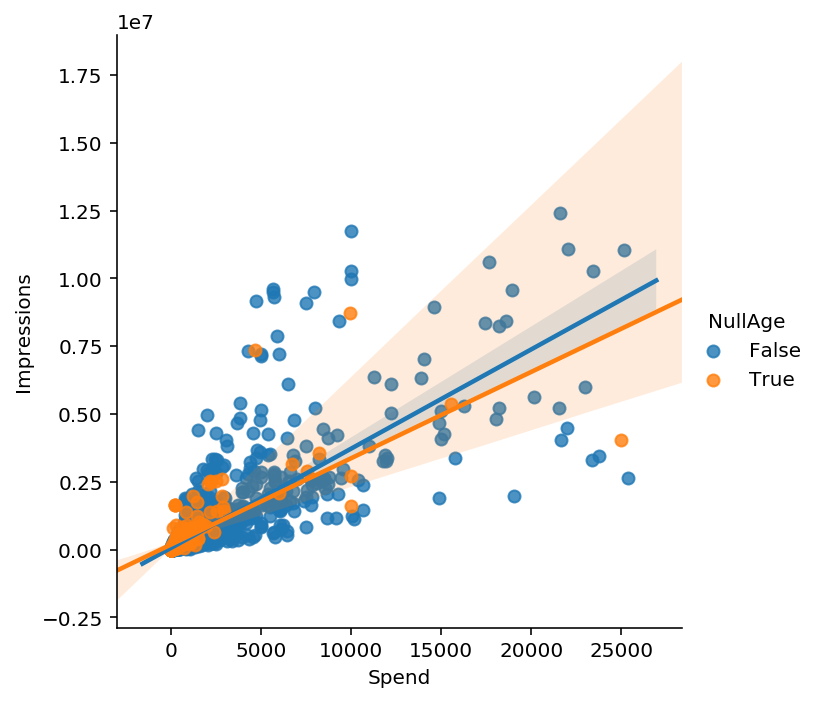

In [125]:
# create a new data frame with relevant columns
spend_imp_by_age = data_no_out[['Spend', 'Impressions', 'AgeBracket']].copy()

# add a column 'NullAge' that is True if the ad has a null value in 'AgeBracket' and False otherwise
spend_imp_by_age['NullAge'] = spend_imp_by_age['AgeBracket'].isna()

# plot the linear regression plots
sns.lmplot(data=spend_imp_by_age, x='Spend', y='Impressions', hue='NullAge')

Based on the plot, it seems as if targeting age has roughly no effect on relationship between 'Spend' to 'Impressions'. However, something els
this can be explained by the fact that low budget advertisements must be specific in 




# Concluding EDA:
It is now up to the company to assess how much an impression is worth.




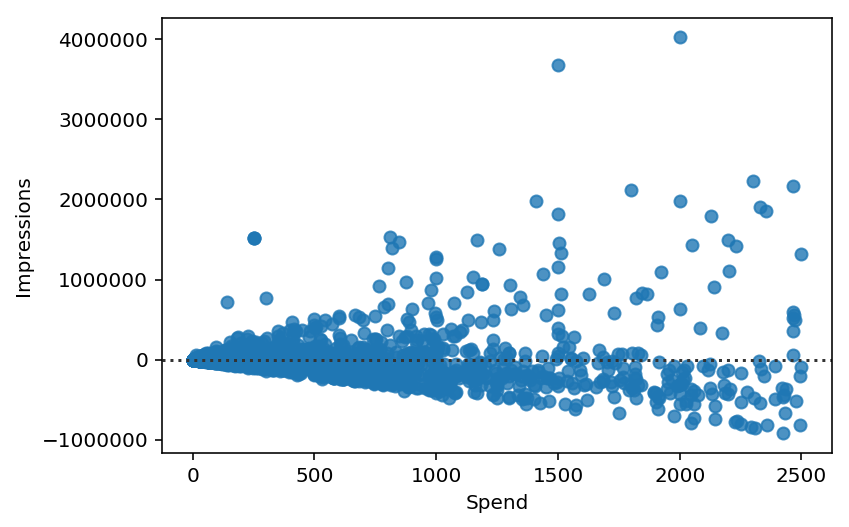

In [21]:
# plot the residual to determine the a
sns.residplot(data=data_spend_below_2500, x='Spend', y='Impressions')
# sns.residplot(data=ad_data, x='Spend', y='Impressions')

# look at the high residual and low residuals @@@@@@@@@@@@@@@@@

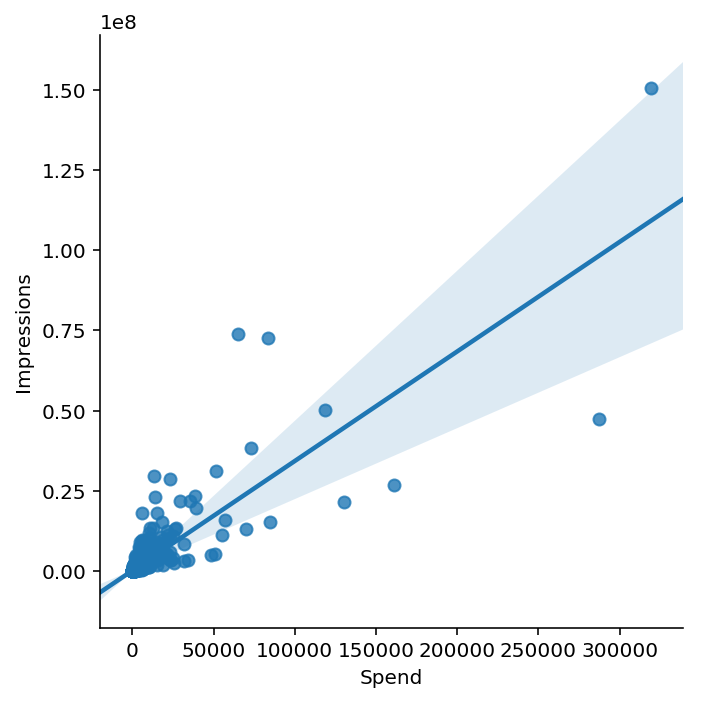

In [12]:
sns.lmplot(data=ad_data, x='Spend', y='Impressions')

In [ ]:
# raises questions: what makes those outliers successful?
# what makes the the other outliers fail?

In [26]:
# more exploration
ad_data['AgeBracket'].value_counts()
# could compare whether or not specifying AgeBracket (or any other specification) increases spend to impression ratio

18+      1095
18-30     336
18-34     226
17+       137
18-24     109
18-29      83
21+        79
25+        75
18-25      74
18-        46
35++       42
21-34      39
16+        36
18-20      33
20+        31
20-        31
17-        30
34-        29
14-19      28
19+        27
18-28      27
15-17      26
17-24      23
30+        21
15-20      19
25-        17
15+        17
20-29      15
18-23      15
16-25      13
         ... 
15-22       2
18-18       2
26+         2
24-34       2
23-         1
19-25       1
16-22       1
18-22       1
28+         1
25-29       1
19-27       1
19-19       1
19-30       1
14-17       1
20-21       1
15-19       1
15-23       1
17-34       1
33+         1
17-18       1
20-25       1
17-29       1
22-32       1
20-26       1
17-21       1
31-34       1
26-30       1
14-25       1
18-27       1
23-33       1
Name: AgeBracket, Length: 102, dtype: int64

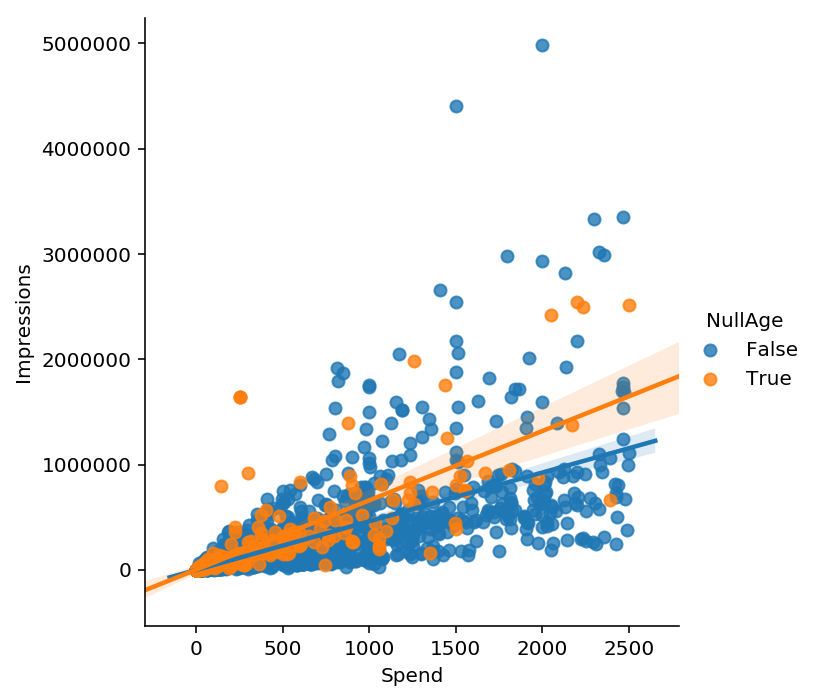

In [33]:
spend_imp_by_age = data_spend_below_2500[['Spend', 'Impressions', 'AgeBracket']].copy()
spend_imp_by_age['NullAge'] = spend_imp_by_age['AgeBracket'].isna()
sns.lmplot(data=spend_imp_by_age, x='Spend', y='Impressions', hue='NullAge')
# spend_imp_by_age

### Assessment of Missingness

In [16]:
# get the proportion of null values for each column
prop_null = ad_data.isna().mean()# > 0
# find the columns with null values
has_null = pd.Series(prop_null[prop_null > 0].index)

# the proportion of null values in each column
prop_null

ADID                           0.000000
CreativeUrl                    0.000000
Spend                          0.000000
Impressions                    0.000000
StartDate                      0.000000
EndDate                        0.198607
OrganizationName               0.000000
BillingAddress                 0.000000
CandidateBallotInformation     0.931880
PayingAdvertiserName           0.000000
Gender                         0.902513
AgeBracket                     0.082955
CountryCode                    0.000000
RegionID                       0.693309
ElectoralDistrictID            0.980321
LatLongRad                     1.000000
MetroID                        0.945504
Interests                      0.762035
OsType                         0.993642
Segments                       0.337269
LocationType                   0.994550
Language                       0.723282
AdvancedDemographics           0.970936
Targeting Connection Type      1.000000
Targeting Carrier (ISP)        1.000000


In [17]:
# the following columns have null values
print(has_null)

0                         EndDate
1      CandidateBallotInformation
2                          Gender
3                      AgeBracket
4                        RegionID
5             ElectoralDistrictID
6                      LatLongRad
7                         MetroID
8                       Interests
9                          OsType
10                       Segments
11                   LocationType
12                       Language
13           AdvancedDemographics
14      Targeting Connection Type
15        Targeting Carrier (ISP)
16    Targeting Geo - Postal Code
17             CreativeProperties
dtype: object


In [18]:
# the following columns have values missin by design

    # Gender: if null, then target all genders
    # AgeBracket: if null, then target all ages
    # RegionID: if null, then target all regions in target country
    # ElectoralDistrickID: if null, then target all electoral districts in the target country
    # LatLongRad: if null, then target all lat/long in the target country
    # MetroID: if null, then target all metros in the target country
    # Interests: if null, then the ad is agnostic to interests
    # OsType: if null, then target all operating systems
    # Language: if null, then the ad is agnostic to language
    # AdvancedDemographics: if null, then the ad is agnostic to 3rd party data segments
    # Targeting Connection Type: if null, then the ad is agnostic to internet connection type
    # Targeting Carrier (ISP): if null, then the ad is agnostic to carrier type
    # Targeting Geo-Postal Code: if null, then targets all postal codes in the target country

# columns missing by design
mbd = [
    'Gender', 'AgeBracket', 'RegionID', 'ElectoralDistrictID', 'LatLongRad', 'MetroID',
    'Interests', 'OsType', 'Language', 'AdvancedDemographics', 'Targeting Connection Type', 
    'Targeting Carrier (ISP)', 'Targeting Geo - Postal Code'
]

# get the column names that are not missing by design
not_mbd = has_null[has_null.isin(mbd) == False]
not_mbd

0                        EndDate
1     CandidateBallotInformation
10                      Segments
11                  LocationType
17            CreativeProperties
dtype: object

In [19]:
# the proportion of nulls for the remaining columns
prop_null[not_mbd]

EndDate                       0.198607
CandidateBallotInformation    0.931880
Segments                      0.337269
LocationType                  0.994550
CreativeProperties            0.195883
dtype: float64

In [ ]:
# TODO

### Hypothesis Test

In [ ]:
# TODO

# Further Exploration
Upon finding that spending had a positive correlation with impressions, we could identify the data points with high and low residuals to search for defining characteristics